# Eigendecomposition

## 1. Impor _Library_

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from eigenDecomposition import EigenDecomposition
import pandas as pd

## 2. Data Loading

### 2.a. Membaca Data

In [74]:
path = './Data Mentah/'
with open(path+'Alkohol.txt', 'r') as file:
    alkohol = np.loadtxt(file, delimiter='\t')

with open(path+'Aseton.txt', 'r') as file:
    aseton = np.loadtxt(file, delimiter='\t')

with open(path+'Etanol.txt', 'r') as file:
    etanol = np.loadtxt(file, delimiter='\t')

with open(path+'Hexana.txt', 'r') as file:
    hexana = np.loadtxt(file, delimiter='\t')

### 2.b. Standardisasi Data

In [75]:
scaler_alkohol = MinMaxScaler()
scaler_aseton = MinMaxScaler()
scaler_etanol = MinMaxScaler()
scaler_hexana = MinMaxScaler()
alkohol[:, 1] = scaler_alkohol.fit_transform(alkohol[:, 1].reshape(-1, 1)).reshape(-1)
aseton[:, 1] = scaler_aseton.fit_transform(aseton[:, 1].reshape(-1, 1)).reshape(-1)
etanol[:, 1] = scaler_etanol.fit_transform(etanol[:, 1].reshape(-1, 1)).reshape(-1)
hexana[:, 1] = scaler_hexana.fit_transform(hexana[:, 1].reshape(-1, 1)).reshape(-1)


### 2.c. Pencampuran Zat

In [76]:
alkohol_hexana = {
    '9:1': np.vstack((alkohol[:,0], alkohol[:, 1]*0.9 + hexana[:, 1]*0.1)),
    '8:2': np.vstack((alkohol[:,0], alkohol[:, 1]*0.8 + hexana[:, 1]*0.2)),
    '7:3': np.vstack((alkohol[:,0], alkohol[:, 1]*0.7 + hexana[:, 1]*0.3)),
    '6:4': np.vstack((alkohol[:,0], alkohol[:, 1]*0.6 + hexana[:, 1]*0.4)),
    '5:5': np.vstack((alkohol[:,0], alkohol[:, 1]*0.5 + hexana[:, 1]*0.5)),
    '4:6': np.vstack((alkohol[:,0], alkohol[:, 1]*0.4 + hexana[:, 1]*0.6)),
    '3:7': np.vstack((alkohol[:,0], alkohol[:, 1]*0.3 + hexana[:, 1]*0.7)),
    '2:8': np.vstack((alkohol[:,0], alkohol[:, 1]*0.2 + hexana[:, 1]*0.8)),
    '1:9': np.vstack((alkohol[:,0], alkohol[:, 1]*0.1 + hexana[:, 1]*0.9))
}

alkohol_aseton = {
    '9:1': np.vstack((alkohol[:,0], alkohol[:, 1]*0.9 + aseton[:, 1]*0.1)),
    '8:2': np.vstack((alkohol[:,0], alkohol[:, 1]*0.8 + aseton[:, 1]*0.2)),
    '7:3': np.vstack((alkohol[:,0], alkohol[:, 1]*0.7 + aseton[:, 1]*0.3)),
    '6:4': np.vstack((alkohol[:,0], alkohol[:, 1]*0.6 + aseton[:, 1]*0.4)),
    '5:5': np.vstack((alkohol[:,0], alkohol[:, 1]*0.5 + aseton[:, 1]*0.5)),
    '4:6': np.vstack((alkohol[:,0], alkohol[:, 1]*0.4 + aseton[:, 1]*0.6)),
    '3:7': np.vstack((alkohol[:,0], alkohol[:, 1]*0.3 + aseton[:, 1]*0.7)),
    '2:8': np.vstack((alkohol[:,0], alkohol[:, 1]*0.2 + aseton[:, 1]*0.8)),
    '1:9': np.vstack((alkohol[:,0], alkohol[:, 1]*0.1 + aseton[:, 1]*0.9))
}

alkohol_etanol = {
    '9:1': np.vstack((alkohol[:,0], alkohol[:, 1]*0.9 + etanol[:, 1]*0.1)),
    '8:2': np.vstack((alkohol[:,0], alkohol[:, 1]*0.8 + etanol[:, 1]*0.2)),
    '7:3': np.vstack((alkohol[:,0], alkohol[:, 1]*0.7 + etanol[:, 1]*0.3)),
    '6:4': np.vstack((alkohol[:,0], alkohol[:, 1]*0.6 + etanol[:, 1]*0.4)),
    '5:5': np.vstack((alkohol[:,0], alkohol[:, 1]*0.5 + etanol[:, 1]*0.5)),
    '4:6': np.vstack((alkohol[:,0], alkohol[:, 1]*0.4 + etanol[:, 1]*0.6)),
    '3:7': np.vstack((alkohol[:,0], alkohol[:, 1]*0.3 + etanol[:, 1]*0.7)),
    '2:8': np.vstack((alkohol[:,0], alkohol[:, 1]*0.2 + etanol[:, 1]*0.8)),
    '1:9': np.vstack((alkohol[:,0], alkohol[:, 1]*0.1 + etanol[:, 1]*0.9))
}

aseton_etanol = {
    '9:1': np.vstack((aseton[:,0], aseton[:, 1]*0.9 + etanol[:, 1]*0.1)),
    '8:2': np.vstack((aseton[:,0], aseton[:, 1]*0.8 + etanol[:, 1]*0.2)),
    '7:3': np.vstack((aseton[:,0], aseton[:, 1]*0.7 + etanol[:, 1]*0.3)),
    '6:4': np.vstack((aseton[:,0], aseton[:, 1]*0.6 + etanol[:, 1]*0.4)),
    '5:5': np.vstack((aseton[:,0], aseton[:, 1]*0.5 + etanol[:, 1]*0.5)),
    '4:6': np.vstack((aseton[:,0], aseton[:, 1]*0.4 + etanol[:, 1]*0.6)),
    '3:7': np.vstack((aseton[:,0], aseton[:, 1]*0.3 + etanol[:, 1]*0.7)),
    '2:8': np.vstack((aseton[:,0], aseton[:, 1]*0.2 + etanol[:, 1]*0.8)),
    '1:9': np.vstack((aseton[:,0], aseton[:, 1]*0.1 + etanol[:, 1]*0.9))
}

## 3. Perhitungan

### 3.a. Alkohol - Aseton

In [77]:
D = np.concatenate(
        (
            alkohol_aseton['9:1'][1].reshape(-1, 1),
            alkohol_aseton['8:2'][1].reshape(-1, 1),
            alkohol_aseton['7:3'][1].reshape(-1, 1),
            alkohol_aseton['6:4'][1].reshape(-1, 1),
            alkohol_aseton['5:5'][1].reshape(-1, 1),
            alkohol_aseton['4:6'][1].reshape(-1, 1),
            alkohol_aseton['3:7'][1].reshape(-1, 1),
            alkohol_aseton['2:8'][1].reshape(-1, 1),
            alkohol_aseton['1:9'][1].reshape(-1, 1)
        ),
        axis=1
    )

eigen = EigenDecomposition(D)
concentration = eigen.getPureConcentration()
P = eigen.getPureSpectra()
df = pd.DataFrame(concentration.T, columns=['x', 'y'])
df['Aseton'] = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
df['Alkohol'] = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
relative_error = df[['Alkohol', 'Aseton']].values - df[['y', 'x']].values
relative_error = abs(relative_error[:,0])
rmse = np.sqrt(np.mean(relative_error**2))
rmse

0.08332325279919447

Konsentrasi Perhitungan vs Sebenarnya

In [78]:
df

,x,y,Aseton,Alkohol
0,0.102957,0.897043,0.1,0.9
1,0.184937,0.815063,0.2,0.8
2,0.266917,0.733083,0.3,0.7
3,0.348897,0.651103,0.4,0.6
4,0.430877,0.569123,0.5,0.5
5,0.512857,0.487143,0.6,0.4
6,0.594837,0.405163,0.7,0.3
7,0.676817,0.323183,0.8,0.2
8,0.758797,0.241203,0.9,0.1


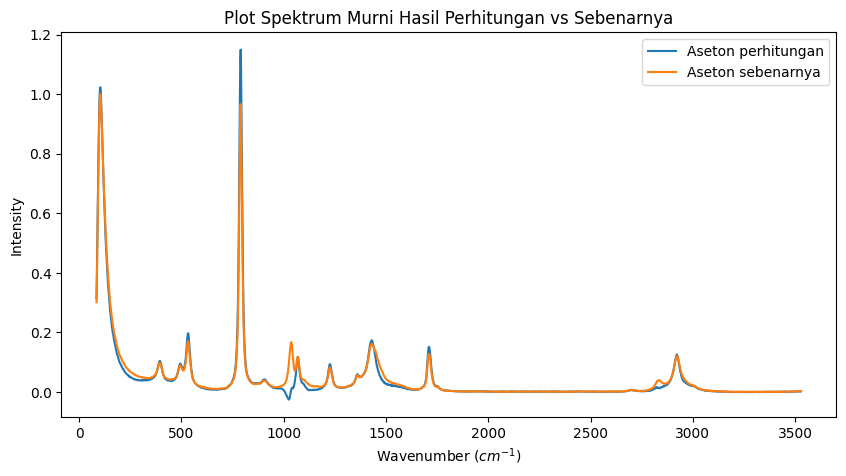

In [79]:
plt.figure(figsize=(10, 5))
plt.plot(aseton[:, 0], P[:, 0], label='Aseton perhitungan')
plt.plot(aseton[:, 0], aseton[:, 1], label='Aseton sebenarnya')
plt.xlabel(r'Wavenumber $(cm^{-1})$')
plt.ylabel('Intensity')
plt.title("Plot Spektrum Murni Hasil Perhitungan vs Sebenarnya")
plt.legend()
plt.show()

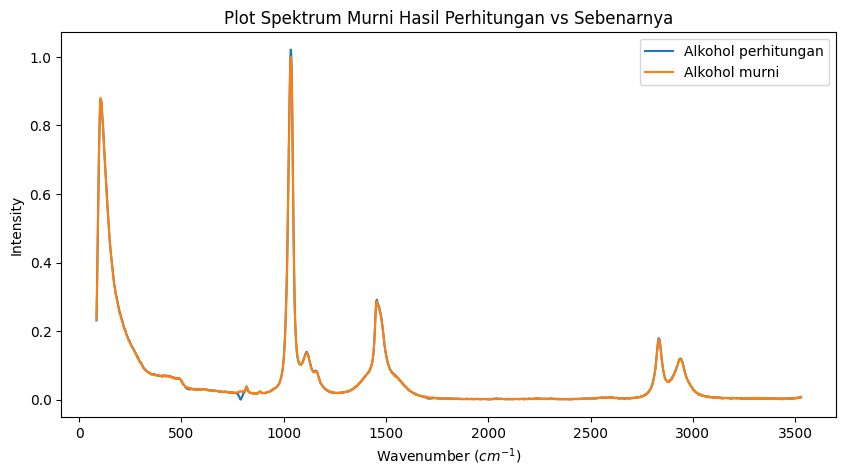

In [80]:
plt.figure(figsize=(10, 5))
plt.plot(alkohol[:, 0], P[:, 1], label='Alkohol perhitungan')
plt.plot(alkohol[:, 0], alkohol[:, 1], label='Alkohol murni')
plt.xlabel(r'Wavenumber $(cm^{-1})$')
plt.ylabel('Intensity')
plt.title("Plot Spektrum Murni Hasil Perhitungan vs Sebenarnya")
plt.legend()
plt.show()

### 3.b. Alkohol - Etanol

In [81]:
D = np.concatenate(
        (
            alkohol_etanol['9:1'][1].reshape(-1, 1),
            alkohol_etanol['8:2'][1].reshape(-1, 1),
            alkohol_etanol['7:3'][1].reshape(-1, 1),
            alkohol_etanol['6:4'][1].reshape(-1, 1),
            alkohol_etanol['5:5'][1].reshape(-1, 1),
            alkohol_etanol['4:6'][1].reshape(-1, 1),
            alkohol_etanol['3:7'][1].reshape(-1, 1),
            alkohol_etanol['2:8'][1].reshape(-1, 1),
            alkohol_etanol['1:9'][1].reshape(-1, 1)
        ),
        axis=1
    )

eigen = EigenDecomposition(D)
concentration = eigen.getPureConcentration()
df = pd.DataFrame(concentration.T, columns=['x', 'y'])
df['Etanol'] = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
df['Alkohol'] = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
relative_error = df[['Alkohol', 'Etanol']].values - df[['y', 'x']].values
relative_error = abs(relative_error[:,0])
rmse = np.sqrt(np.mean(relative_error**2))
rmse

0.09403308429575351

Konsentrasi Perhitungan vs Sebenarnya

In [82]:
df

,x,y,Etanol,Alkohol
0,0.100004,0.899996,0.1,0.9
1,0.180252,0.819748,0.2,0.8
2,0.260501,0.739499,0.3,0.7
3,0.340749,0.659251,0.4,0.6
4,0.420997,0.579003,0.5,0.5
5,0.501246,0.498754,0.6,0.4
6,0.581494,0.418506,0.7,0.3
7,0.661743,0.338257,0.8,0.2
8,0.741991,0.258009,0.9,0.1


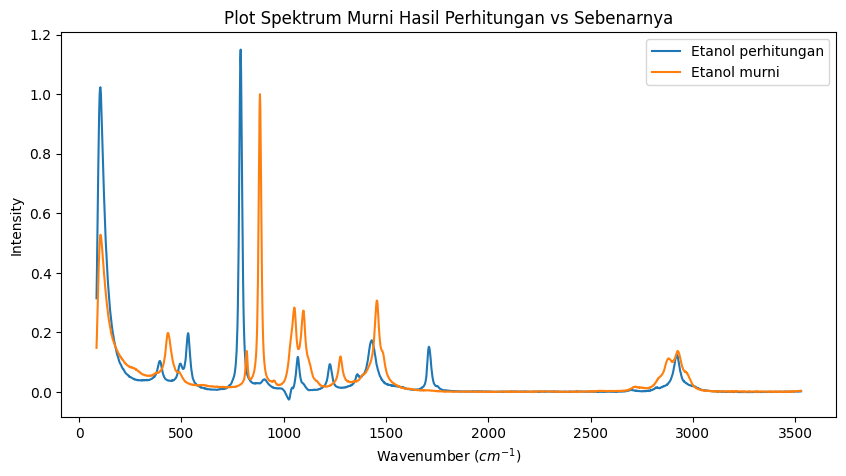

In [83]:
plt.figure(figsize=(10, 5))
plt.plot(etanol[:, 0], P[:, 0], label='Etanol perhitungan')
plt.plot(etanol[:, 0], etanol[:, 1], label='Etanol murni')
plt.xlabel(r'Wavenumber $(cm^{-1})$')
plt.ylabel('Intensity')
plt.title("Plot Spektrum Murni Hasil Perhitungan vs Sebenarnya")
plt.legend()
plt.show()

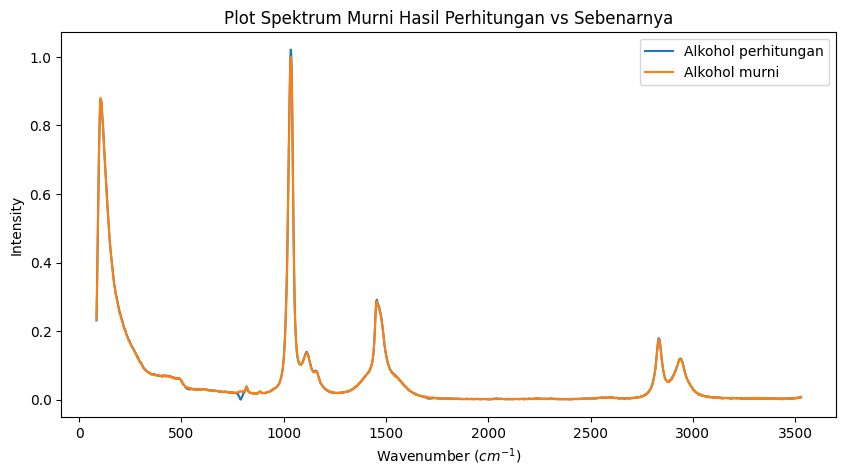

In [84]:
plt.figure(figsize=(10, 5))
plt.plot(alkohol[:, 0], P[:, 1], label='Alkohol perhitungan')
plt.plot(alkohol[:, 0], alkohol[:, 1], label='Alkohol murni')
plt.xlabel(r'Wavenumber $(cm^{-1})$')
plt.ylabel('Intensity')
plt.title("Plot Spektrum Murni Hasil Perhitungan vs Sebenarnya")
plt.legend()
plt.show()

### 3.c. Aseton - Etanol

In [85]:
D = np.concatenate(
        (
            aseton_etanol['9:1'][1].reshape(-1, 1),
            aseton_etanol['8:2'][1].reshape(-1, 1),
            aseton_etanol['7:3'][1].reshape(-1, 1),
            aseton_etanol['6:4'][1].reshape(-1, 1),
            aseton_etanol['5:5'][1].reshape(-1, 1),
            aseton_etanol['4:6'][1].reshape(-1, 1),
            aseton_etanol['3:7'][1].reshape(-1, 1),
            aseton_etanol['2:8'][1].reshape(-1, 1),
            aseton_etanol['1:9'][1].reshape(-1, 1)
        ),
        axis=1
    )

eigen = EigenDecomposition(D)
concentration = eigen.getPureConcentration()
P = eigen.getPureSpectra()
df = pd.DataFrame(concentration.T, columns=['x', 'y'])
df['Etanol'] = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
df['Aseton'] = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
relative_error = df[['Aseton', 'Etanol']].values - df[['y', 'x']].values
relative_error = abs(relative_error[:,0])
rmse = np.sqrt(np.mean(relative_error**2))
rmse

0.013727503624762404

Konsentrasi Perhitungan vs Sebenarnya

In [86]:
df

,x,y,Etanol,Aseton
0,0.122178,0.877822,0.1,0.9
1,0.216875,0.783125,0.2,0.8
2,0.311571,0.688429,0.3,0.7
3,0.406268,0.593732,0.4,0.6
4,0.500964,0.499036,0.5,0.5
5,0.595661,0.404339,0.6,0.4
6,0.690357,0.309643,0.7,0.3
7,0.785054,0.214946,0.8,0.2
8,0.879750,0.120250,0.9,0.1


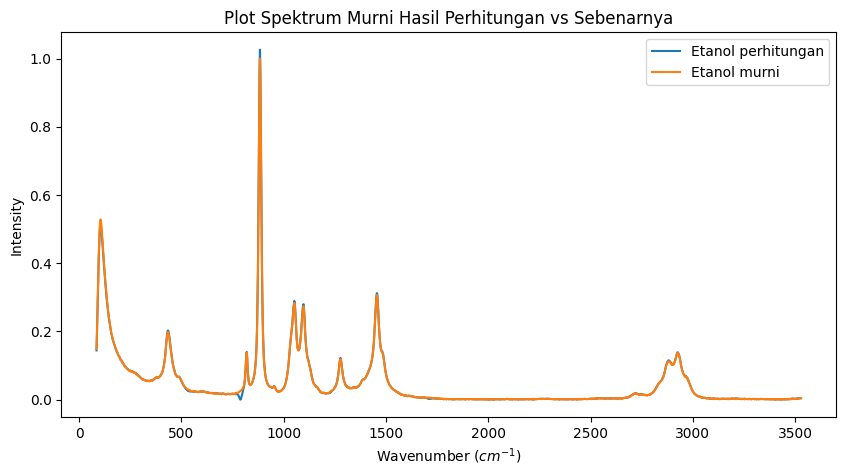

In [87]:
plt.figure(figsize=(10, 5))
plt.plot(etanol[:, 0], P[:, 0], label='Etanol perhitungan')
plt.plot(etanol[:, 0], etanol[:, 1], label='Etanol murni')
plt.xlabel(r'Wavenumber $(cm^{-1})$')
plt.ylabel('Intensity')
plt.title("Plot Spektrum Murni Hasil Perhitungan vs Sebenarnya")
plt.legend()
plt.show()

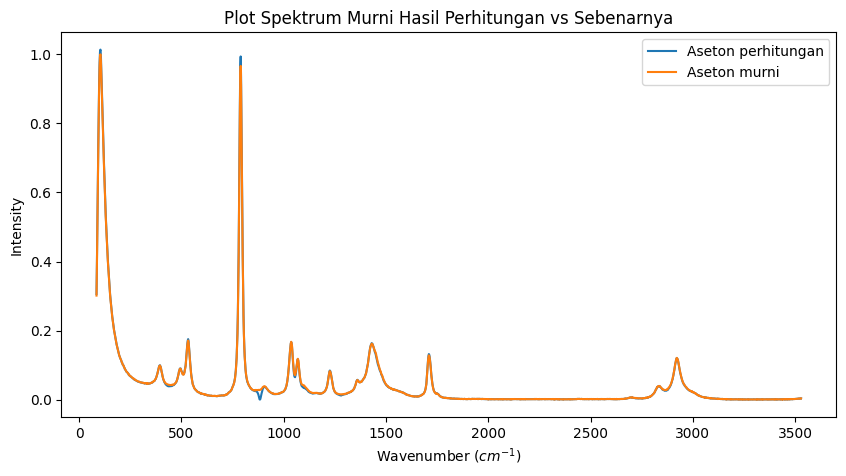

In [88]:
plt.figure(figsize=(10, 5))
plt.plot(aseton[:, 0], P[:, 1], label='Aseton perhitungan')
plt.plot(aseton[:, 0], aseton[:, 1], label='Aseton murni')
plt.xlabel(r'Wavenumber $(cm^{-1})$')
plt.ylabel('Intensity')
plt.legend()
plt.title("Plot Spektrum Murni Hasil Perhitungan vs Sebenarnya")
plt.show()

### 3.d. Alkohol - Hexana

In [89]:
D = np.concatenate(
        (
            alkohol_hexana['9:1'][1].reshape(-1, 1),
            alkohol_hexana['8:2'][1].reshape(-1, 1),
            alkohol_hexana['7:3'][1].reshape(-1, 1),
            alkohol_hexana['6:4'][1].reshape(-1, 1),
            alkohol_hexana['5:5'][1].reshape(-1, 1),
            alkohol_hexana['4:6'][1].reshape(-1, 1),
            alkohol_hexana['3:7'][1].reshape(-1, 1),
            alkohol_hexana['2:8'][1].reshape(-1, 1),
            alkohol_hexana['1:9'][1].reshape(-1, 1)
        ),
        axis=1
    )

eigen = EigenDecomposition(D)
P = eigen.getPureSpectra()
concentration = eigen.getPureConcentration()
df = pd.DataFrame(concentration.T, columns=['x', 'y'])
df['Hexana'] = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
df['Alkohol'] = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
relative_error = df[['Alkohol', 'Hexana']].values - df[['y', 'x']].values
relative_error = abs(relative_error[:,0])
rmse = np.sqrt(np.mean(relative_error**2))
rmse

0.19889016753883762

Konsentrasi Perhitungan vs Sebenarnya

In [90]:
df

,x,y,Hexana,Alkohol
0,0.088356,0.911644,0.1,0.9
1,0.148657,0.851343,0.2,0.8
2,0.208957,0.791043,0.3,0.7
3,0.269258,0.730742,0.4,0.6
4,0.329559,0.670441,0.5,0.5
5,0.389859,0.610141,0.6,0.4
6,0.450160,0.549840,0.7,0.3
7,0.510460,0.489540,0.8,0.2
8,0.570761,0.429239,0.9,0.1


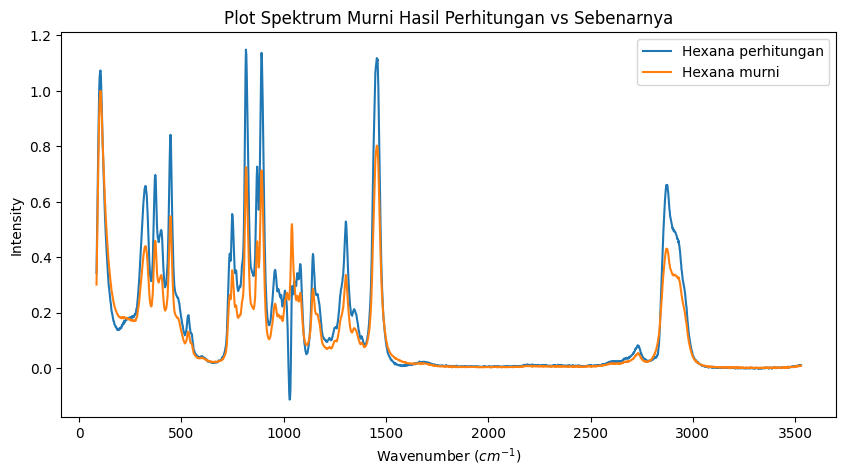

In [94]:
plt.figure(figsize=(10, 5))
plt.plot(alkohol[:, 0], P[:, 0], label='Hexana perhitungan')
plt.plot(hexana[:, 0], hexana[:, 1], label='Hexana murni')
plt.xlabel(r'Wavenumber $(cm^{-1})$')
plt.ylabel('Intensity')
plt.legend()
plt.title("Plot Spektrum Murni Hasil Perhitungan vs Sebenarnya")
plt.show()

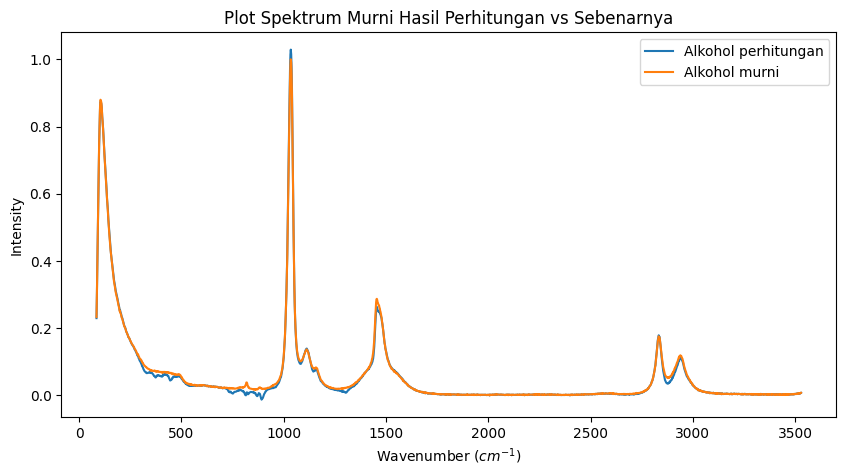

In [95]:
plt.figure(figsize=(10, 5))
plt.plot(alkohol[:, 0], P[:, 1], label='Alkohol perhitungan')
plt.plot(alkohol[:, 0], alkohol[:, 1], label='Alkohol murni')
plt.xlabel(r'Wavenumber $(cm^{-1})$')
plt.ylabel('Intensity')
plt.title("Plot Spektrum Murni Hasil Perhitungan vs Sebenarnya")
plt.legend()
plt.show()